In [1]:
from clustering.preprocess import Preprocess
from clustering.kmeans import KMeansClustering
from clustering.lda import LDA
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
data_dev = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_dev.csv")
data_train = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_train.csv")
HS = '1'
TR = '1'
AG = '1'
filtered_dev = Preprocess.filter_sem_eval(X=data_dev, HS=HS, TR=TR, AG=AG)
filtered_train = Preprocess.filter_sem_eval(X=data_train, HS=HS, TR=TR, AG=AG)
filtered_data = filtered_dev + filtered_train
tweets = [x[1] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 1000
INFO:root:After applying filters: 109
INFO:root:Data length after removing invalid tweets: 48
INFO:root:Original data length: 9000
INFO:root:After applying filters: 461
INFO:root:Data length after removing invalid tweets: 160
INFO:root:Explained variance of the SVD step: 68%


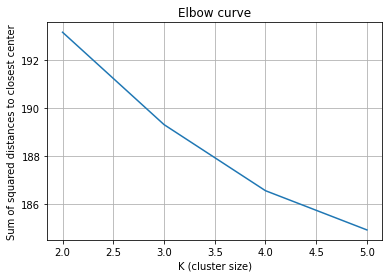

In [3]:
%matplotlib inline
# Lower values are better
km.plot_elbow_curve(max_k=5, X=X)

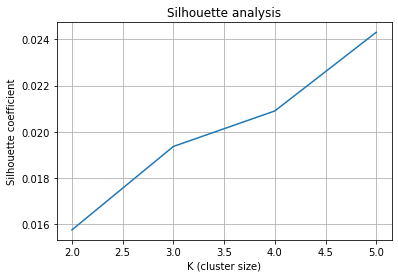

In [4]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=5, X=X)

In [5]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 hoe stfu im bitch know ur dumb dont life ass

Cluster 1:
 ass bitch beat getting im dick yo suck mind pussy

Cluster 2:
 bitch whore skank stop like want just rape girl ll

Cluster 3:
 fuck shut fucking bitch cunt dont like just youre pussy

Cluster 4:
 stfu pussy bitch make aint shit noise ass lil lol



In [6]:
NUM_SAMPLES=5
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=NUM_SAMPLES)

Cluster 0: most representative sample indices: [197 186 143 175  96]
['9016', 'You call girls a hoe but youre a hoe too?? Lol stfu lame ass bitch', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8869', 'Im so sick of this hoe speaking on me bitch you dont know SHIT STFU', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['6025', 'also keep my name out of ur hoe ass mouth I literally refer to u only as cunt and bitch', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8747', 'first goes to bitch ass janelle. FUCK YOU MESSY MF ASS BITCH i literally was on a call with her and her dumb ass twisted my words and ran to tattle on me to ari. like it legit made her pussy wet to go and talk shit abt me so fuck u ill come beat ur ass thats why u stole a listers', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['5129', 'Control, I own your ass now bitch